<a href="https://colab.research.google.com/github/hamzaaslam276/a/blob/main/Naive_Bayes(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [4]:
df.drop(['deck','sibsp','parch','embark_town','embarked','alive','alone','adult_male','who'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
class,0


In [6]:
df['age']=df['age'].fillna(df['age'].mean())

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'class'], dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['sex', 'class']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
df.dtypes

,0
survived,int64
pclass,int64
sex,int64
age,float64
fare,float64
class,int64


In [10]:
df[['age', 'fare']] = df[['age', 'fare']].apply(lambda x: x.astype(int))

In [11]:
x = df.drop('survived', axis=1)
y = df['survived']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [14]:
model.score(x_test, y_test)

0.7541899441340782

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test)

In [16]:
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)


Accuracy Score: 0.7541899441340782


In [17]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[83 22]
 [22 52]]


In [18]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       105
           1       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



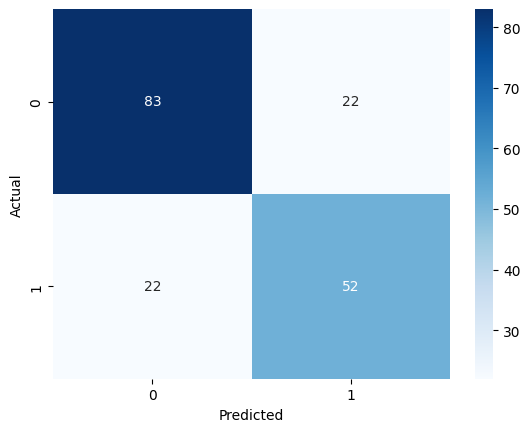

In [19]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()